In [1]:
import sqlite3 as sq
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
db_conn = None
def get_connection():
    global db_conn
    if db_conn is None:
        db_conn = sq.connect('chinook.db')
    # print(db_conn)
    return db_conn

In [3]:
def run_query(sql):
    df = pd.read_sql_query(sql, get_connection())
    # print(df)
    return df

In [4]:
def run_command(sql):
    get_connection().execute(sql)

In [5]:
def show_tables():
    return run_query('SELECT * FROM sqlite_master')

In [6]:
show_tables()

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [7]:
genre_query = ('WITH usa_tracks AS '
                   '(SELECT tr.*'
                    '  FROM track tr '
                'INNER JOIN invoice_line il ON il.track_id = tr.track_id '
                'INNER JOIN invoice inv ON il.invoice_id = inv.invoice_id '
                     'WHERE inv.billing_country = "USA" ), '
               '     total_usa_tracks AS '
               '    (SELECT COUNT(*) total_usa_count FROM usa_tracks) '
               'SELECT gn.name, '
                    '  COUNT(ut.track_id) genre_tracks, '
                    '  (CAST(COUNT(ut.track_id) as float) / (SELECT total_usa_count FROM total_usa_tracks) * 100) genre_percent '
                 'FROM genre gn '
           'INNER JOIN usa_tracks ut ON ut.genre_id = gn.genre_id '
             'GROUP BY gn.name '
             'ORDER BY genre_tracks DESC'
              )

usa_genre_summary = run_query(genre_query)

In [8]:
usa_genre_summary

,name,genre_tracks,genre_percent
0,Rock,561,53.377735
1,Alternative & Punk,130,12.369172
2,Metal,124,11.798287
3,R&B/Soul,53,5.042816
4,Blues,36,3.425309
5,Alternative,35,3.330162
6,Latin,22,2.093245
7,Pop,22,2.093245
8,Hip Hop/Rap,20,1.902950
9,Jazz,14,1.332065


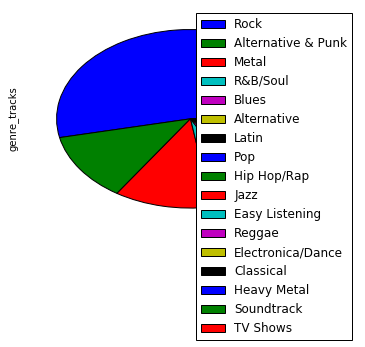

In [9]:
fig, ax = plt.subplots()
usa_genre_summary.plot(kind='pie', labels=None, y='genre_tracks', ax=ax)
ax.legend(labels=usa_genre_summary['name'])

From the above analysis it is clear that in the US market, the **Rock** genre is by far the most popular with over 50% of the sales. The genres **Alternative & Punk** and **Metal** come an extremely distant second and third in terms of sales numbers.

In [10]:
artist_in_genre_query = ('    WITH usa_tracks AS '
                         '        (SELECT tr.*'
                         '           FROM track tr '
                         '     INNER JOIN invoice_line il ON il.track_id = tr.track_id '
                         '     INNER JOIN invoice inv ON il.invoice_id = inv.invoice_id '
                         '          WHERE inv.billing_country = "USA" ), '
                         '         total_usa_tracks AS '
                         '        (SELECT COUNT(*) total_usa_count FROM usa_tracks) '
                         '    SELECT ar.name, '
                         '           gn.name, '
                         '           COUNT(ut.track_id) artist_tracks, '
                         '           (CAST(COUNT(ut.track_id) as float) / (SELECT total_usa_count FROM total_usa_tracks) * 100) genre_percent '
                         '      FROM usa_tracks ut '
                         'INNER JOIN genre gn ON ut.genre_id = gn.genre_id '
                         'INNER JOIN album al ON ut.album_id = al.album_id '
                         'INNER JOIN artist ar ON al.artist_id = ar.artist_id'
                         '  GROUP BY ar.name, '
                         '           gn.name'
                         '  ORDER BY artist_tracks DESC'
                        )

usa_artist_in_genre_summary = run_query(artist_in_genre_query)

In [11]:
usa_artist_in_genre_summary

,name,name,artist_tracks,genre_percent
0,Van Halen,Rock,43,4.091342
1,The Rolling Stones,Rock,37,3.520457
2,Nirvana,Rock,35,3.330162
3,Green Day,Alternative & Punk,32,3.044719
4,R.E.M.,Alternative & Punk,32,3.044719
5,Eric Clapton,Blues,31,2.949572
6,AC/DC,Rock,29,2.759277
7,Pearl Jam,Rock,29,2.759277
8,Jimi Hendrix,Rock,28,2.664129
9,The Doors,Rock,27,2.568982


Based on the above data, it may be worthwhile investing in purchasing albums for the artists **Van Halen**, **The Rolling Stones**, and **Nirvana**.

Since all these artists are from the *Rock* genre, it may also make sense to invest in albums from the artists **Green Day** and **R.E.M.** to ensure that the store has some diversity in its offerings. But this should be considered only if capital is available. 

In [12]:
agent_dollars_query = ('    SELECT emp.employee_id,'
                       '           emp.first_name || " " || emp.last_name name, '
                       '           emp.birthdate, '
                       '           emp.hire_date, '
                       '           emp.title, '
                       '           SUM(inv.total) AS dollar_amount'
                       '      FROM employee emp '
                       'INNER JOIN customer cus ON emp.employee_id = cus.support_rep_id '
                       'INNER JOIN invoice inv ON cus.customer_id = inv.customer_id '
                       '     WHERE inv.invoice_date >= DATE("2017-10-17")'
                       '  GROUP BY emp.employee_id'
                      )


agent_dollars = run_query(agent_dollars_query)

In [13]:
agent_dollars

,employee_id,name,birthdate,hire_date,title,dollar_amount
0,3,Jane Peacock,1973-08-29 00:00:00,2017-04-01 00:00:00,Sales Support Agent,1312.74
1,4,Margaret Park,1947-09-19 00:00:00,2017-05-03 00:00:00,Sales Support Agent,1196.91
2,5,Steve Johnson,1965-03-03 00:00:00,2017-10-17 00:00:00,Sales Support Agent,1167.21


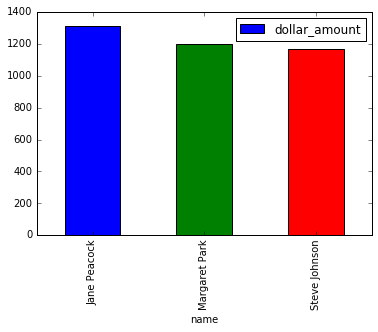

In [14]:
agent_dollars.plot(kind='bar', x='name', y='dollar_amount')

In [15]:
run_query('SELECT * FROM invoice inv INNER JOIN customer cus ON inv.customer_id = cus.customer_id WHERE cus.support_rep_id = 3')

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,customer_id,...,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,16,1,2017-01-26 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,77,1,2017-05-28 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,149,1,2017-11-30 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
3,153,1,2017-12-14 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,13.86,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
4,182,1,2018-02-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
5,184,1,2018-02-09 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
6,223,1,2018-05-04 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,17.82,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
7,270,1,2018-08-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,10.89,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
8,296,1,2018-12-10 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,12.87,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
9,442,1,2019-11-05 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96,1,...,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [23]:
country_purchases = (
    '    SELECT cus.country, '
    '           COUNT(cus.customer_id) count_of_customers,'
    '           SUM(inv.total) total_sales,'
    '           CAST(SUM(inv.total) as float) / COUNT(cus.customer_id) as average_sale_per_customer,'
    '           AVG(inv.total) average_order_value'
    '      FROM customer cus '
    'INNER JOIN invoice inv ON inv.customer_id = cus.customer_id'
    '  GROUP BY cus.country'
    '   HAVING count_of_customers > 1'
    '  ORDER BY count_of_customers DESC'
)

run_query(country_purchases)

,country,count_of_customers,total_sales,average_sale_per_customer,average_order_value
0,USA,131,1040.49,7.942672,7.942672
1,Canada,76,535.59,7.047237,7.047237
2,Brazil,61,427.68,7.011148,7.011148
3,France,50,389.07,7.781400,7.781400
4,Germany,41,334.62,8.161463,8.161463
5,Czech Republic,30,273.24,9.108000,9.108000
6,Portugal,29,185.13,6.383793,6.383793
7,United Kingdom,28,245.52,8.768571,8.768571
8,India,21,183.15,8.721429,8.721429
9,Chile,13,97.02,7.463077,7.463077
